Installing PyTorch

In [1]:
pip install torch 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing The Required Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch import optim
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import seaborn as sn
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

Loading the data set

In [ ]:
iris = datasets.load_iris()

data = iris['data']
target = iris['target']

print(iris.target_names)

print(iris['data'].shape[1])
print(len(iris.target_names))

['setosa' 'versicolor' 'virginica']
4
3


Doing The Train Test Split And Scaling The Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state=42)

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Converting From Numpy Array To Torch Tensor

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Defining Our Neural Network Model For Classification

In [ ]:
# Number of features
Dimensionality = iris['data'].shape[1]  # 4 columns
# Number of classes
Classes = len(iris.target_names) # 3 classes

In [ ]:
# Neural Network
class Net(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(Net, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim
    self.y_pred_test = 0

    # input layer = 4
    # hidden layer 1 = 32
    # hidden layer 2 = 8
    # output layer = 3 
    self.fc1 = nn.Linear(self.input_dim, 128)  
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, self.output_dim)

  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.log_softmax(self.fc3(x))
    return x

  def train(self, x, y, optimizer, loss_function, epochs):

    # list of store losses
    losses_train = []
    losses_test = []
    for i in range(epochs):
      # Rest Gradient
      optimizer.zero_grad()

      # Forward
      y_pred = self.forward(x)

      # Loss function
      loss_train = loss_function(y_pred, y)
      
      
      # Backward
      loss_train.backward()

      # Update Parametres
      optimizer.step()

      # Add loss item to the list
      losses_train.append(loss_train.item())

      # validation testing
      self.y_pred_test = net.forward(X_test)
      loss_test = loss_function(self.y_pred_test, y_test)
      losses_test.append(loss_test.item())

      if (i + 1) % 200 == 0:
        print(f"Epoch {i+1}/{epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

    return losses_train, losses_test

  def get_accuracy(self, x, y):
    predictions_train = []
    predictions_test =  []
    with torch.no_grad():
      y_pred = self.forward(x)
    count = 0
    for i in range(len(y)):
      if np.argmax(y_pred[i]) == y[i]:
        count +=1
    return count/len(y)

  def confusion_matrix(self, y, labels):
    y_pred = []
    for i in range(len(y)):
      y_pred.append(np.argmax(self.y_pred_test.detach().numpy()[i]))
    conf_matrix = confusion_matrix(y.detach().numpy(), y_pred)
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
    cm_display.plot()
    plt.show()
    return

  def predict(self, x, labals):
    with torch.no_grad():
      x = torch.FloatTensor(x)
      y = self.forward(x)
    return labals[np.argmax(y.detach().numpy())] 


In [ ]:
# Creating a neural network object nammed net
net = Net(Dimensionality, Classes)
print(net)
print(net.parameters())
params = list(net.parameters())
print(len(params))
print(params[0].size())

Net(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)
<generator object Module.parameters at 0x7f713c258d60>
6
torch.Size([128, 4])


In [ ]:
#Learning rate
lr = 0.001

# Number of epochs
epochs = 1000

# Loss function
loss_function = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(net.parameters(), lr=lr)

In [ ]:
# Training the model
losses_train, losses_test = net.train(X_train, y_train, optimizer, loss_function, epochs)

<ipython-input-165-3b388685937b>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc3(x))


Epoch 200/1000, Train Loss: 0.0375, Test Loss: 0.0144
Epoch 400/1000, Train Loss: 0.0074, Test Loss: 0.0082
Epoch 600/1000, Train Loss: 0.0016, Test Loss: 0.0066
Epoch 800/1000, Train Loss: 0.0006, Test Loss: 0.0068
Epoch 1000/1000, Train Loss: 0.0003, Test Loss: 0.0059


In [ ]:
# Calculating the accuracy of the model
train_accuracy = net.get_accuracy(X_train, y_train)
test_accuracy = net.get_accuracy(X_test, y_test)
print(f"Training Accuracy: {round(train_accuracy*100,3)}")
print(f"Test Accuracy: {round(test_accuracy*100,3)}")

Training Accuracy: 100.0
Test Accuracy: 100.0


<ipython-input-165-3b388685937b>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc3(x))


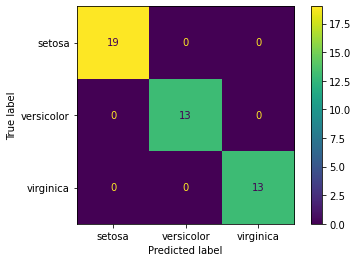

In [ ]:
# Plotting the confusion matrix
net.confusion_matrix(y_test, iris.target_names)

In [ ]:
# Predicting the outcome for a new data the result should be "Iris-setosa"
new_data = [[5.1, 3.1, 1.4, 0.2]]
new_data = scaler.transform(new_data)
train_accuracy = net.predict(new_data, iris.target_names)
print(train_accuracy)

setosa


<ipython-input-165-3b388685937b>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc3(x))


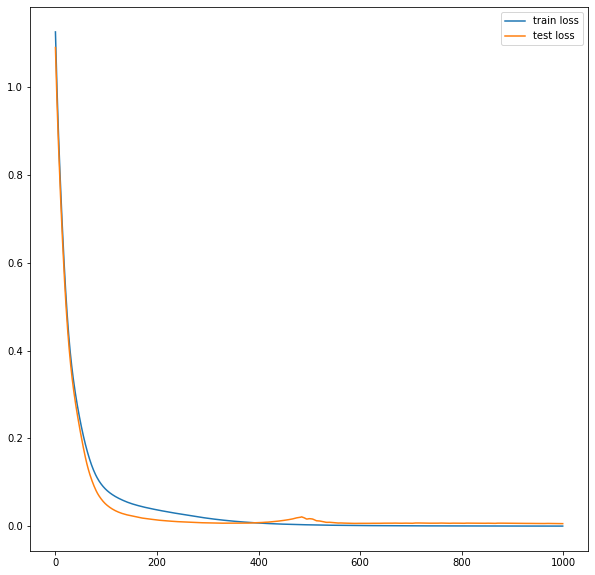

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(10,10))
plt.plot(losses_train, label='train loss')
plt.plot(losses_test, label='validation loss')
plt.legend()
plt.show()